In [2]:
import numpy as np
import pandas as pd
import time

import ipywidgets as widgets
from IPython.display import display, Math, clear_output

import dtmc
import ctmc
import mcviz

In [3]:
import bokeh.plotting as bplt
from bokeh.models import Range1d, LabelSet, ColumnDataSource
from bokeh.models import Arrow, TeeHead, VeeHead, NormalHead, OpenHead
from bokeh.models import Whisker, Span
from bokeh.models.glyphs import Step
from bokeh.models.markers import Circle
from bokeh.io import output_notebook, show, push_notebook
output_notebook()

Loading BokehJS ...

# Continuous-Time Markov Chains: Section 1 – Numerical Example

Consider the rat-in-a-maze example from discrete-time Markov chains.  Previously we only counted “visits” to each room and ignored the amount of time spent in the room (this was the essence of why our model had discrete time).  We now want to incorporate the time spent in a room.

We will again start with a numerical example and specify the dynamics.  We will use the familiar model of the rat in a maze, but add to the model the length of time spent on each visit to the room.  In particular, we will assume that the visits last an exponentially distributed amount of time, where the rate of the exponential distribution may depend on the room visited.  That is, any visit to room $i$ lasts for a time that follows an $\text{Exponential}(v_i)$ distribution.

**Remark:** Why an exponential distribution that depends on the state?  The key idea is to incorporate the time spent in a room in a way that preserves the Markov property in continuous time.  We want the stochastic process to be memoryless.

## Specification


<IPython.core.display.Math object>

<IPython.core.display.Math object>

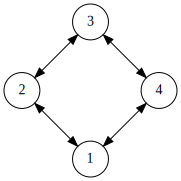

In [4]:
S = [1, 2, 3, 4]
P = np.array([[0, 1/2, 0, 1/2], [1/2, 0, 1/2, 0], [0, 1/2, 0, 1/2], [1/2, 0, 1/2, 0]])
v = [1, 2, 2, 1]

display(Math(r'\mathcal{S} = \{' + ','.join(map(str,S)) + '\}'))
ctmc.disp_ctmc(P, v, frac=True)
digraph = mcviz.dot_mc(P, S, bidir=True)
svg_str = digraph.pipe().decode('utf-8')
display(digraph)

## Embedded DTMC

Note that the specification of the continuous-time Markov chain includes an “embedded” discrete-time Markov chain (given by $\mathcal{S}$ and $\mathbf{P}$).  The embedded DTMC still describes much of the dynamics; in particular, the sequence of visits.  The CTMC additionally describes the length of each visit.

### Exercise 1.1

Consider the continuous-time Markov chain specified above.

Given $t = 1.3489$ and $X(t) = 3$:
* What is the expected amount of time until the Markov chain leaves state $3$?  
* What is the probability it next moves to state $2$?
* What is the probability that it moves from state $3$ to state $4$ within the next 1.5 time units? (Assume it remains in state $3$ until it moves.)

## Sample Path Visualization

In [5]:
def slider_anim(s):
    for t in np.arange(s.min, s.max, s.step):
        time.sleep(0.01)
        s.value=t            

In [6]:
steps = 50
sample_path = ctmc.sim_path(P, v, [1, 0, 0, 0], paths=1, steps=steps, S=S)

In [7]:
dt = 0.05
t_slider = widgets.FloatSlider(value=0, 
                               min=min(sample_path['start']),
                               max=max(sample_path['end']), 
                               step=dt,
                               description='t')
diagram = widgets.Output()
with diagram:
    dtmc.draw(sample_path.loc[0,'X'], svg_str)
    
def diagram_draw(i, out):
    with out:
        clear_output(wait=True)
        dtmc.draw(i, svg_str)

In [8]:
display(t_slider)
p, h, t_mark = ctmc.plot_path(sample_path, S)
display(diagram)
widgets.interactive_output(lambda t: ctmc.path_show_t(t, sample_path, p, h, t_mark), {'t': t_slider});
widgets.interactive_output(lambda t: diagram_draw(sample_path.loc[(sample_path['start']<=t)&(sample_path['end']>t), 'X'].values[0], diagram), {'t': t_slider});

FloatSlider(value=0.0, description='t', max=50.629586306599165, step=0.05)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<IPython.core.display.SVG object>', 'i…

In [9]:
## Animate the sample path above
slider_anim(t_slider)

## Sample path of embedded DTMC

In [10]:
n_slider = widgets.IntSlider(value=0,
                             min=0,
                             max=steps,
                             description='n')
dtmc_diagram = widgets.Output()
with dtmc_diagram:
    dtmc.draw(sample_path.loc[0,'X'], svg_str)

display(n_slider)
dtmc_p, dtmc_h, n_mark = ctmc.plot_dtmc_path(sample_path, S)
display(dtmc_diagram)
widgets.interactive_output(lambda n: ctmc.dtmc_path_show_n(n, sample_path, dtmc_p, dtmc_h, n_mark), {'n': n_slider});
widgets.interactive_output(lambda n: diagram_draw(sample_path.loc[n, 'X'], dtmc_diagram), {'n': n_slider})

IntSlider(value=0, description='n', max=50)

Output()

Output()